# 2018 ford go bike trip data Explorations
## by Madonna

## Preliminary Wrangling

> This is the latest version of the ford go bike trip data set. This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area. It's now called biker share and this is their website <a href= "https://www.bikeshare.com/"> Here</a>

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

> loding the data set and getting to know the structure of it.

In [2]:
df = pd.read_csv('201801-fordgobike-tripdata.csv');
df.head(10)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip
0,75284,2018-01-31 22:52:35.2390,2018-02-01 19:47:19.8240,120,Mission Dolores Park,37.761420,-122.426435,285,Webster St at O'Farrell St,37.783521,-122.431158,2765,Subscriber,No
1,85422,2018-01-31 16:13:34.3510,2018-02-01 15:57:17.3100,15,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,15,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,2815,Customer,No
2,71576,2018-01-31 14:23:55.8890,2018-02-01 10:16:52.1160,304,Jackson St at 5th St,37.348759,-121.894798,296,5th St at Virginia St,37.325998,-121.877120,3039,Customer,No
3,61076,2018-01-31 14:53:23.5620,2018-02-01 07:51:20.5000,75,Market St at Franklin St,37.773793,-122.421239,47,4th St at Harrison St,37.780955,-122.399749,321,Customer,No
4,39966,2018-01-31 19:52:24.6670,2018-02-01 06:58:31.0530,74,Laguna St at Hayes St,37.776435,-122.426244,19,Post St at Kearny St,37.788975,-122.403452,617,Subscriber,No
5,6477,2018-01-31 22:58:44.8670,2018-02-01 00:46:41.9080,236,Market St at 8th St,37.803686,-122.282497,160,West Oakland BART Station,37.805318,-122.294837,1306,Customer,No
6,453,2018-01-31 23:53:53.6320,2018-02-01 00:01:26.8050,110,17th & Folsom Street Park (17th St at Folsom St),37.763708,-122.415204,134,Valencia St at 24th St,37.752428,-122.420628,3571,Subscriber,No
7,180,2018-01-31 23:52:09.9030,2018-01-31 23:55:10.8070,81,Berry St at 4th St,37.775880,-122.393170,93,4th St at Mission Bay Blvd S,37.770407,-122.391198,1403,Subscriber,No
8,996,2018-01-31 23:34:56.0040,2018-01-31 23:51:32.6740,134,Valencia St at 24th St,37.752428,-122.420628,4,Cyril Magnin St at Ellis St,37.785881,-122.408915,3675,Subscriber,Yes
9,825,2018-01-31 23:34:14.0270,2018-01-31 23:47:59.8090,305,Ryland Park,37.342725,-121.895617,317,San Salvador St at 9th St,37.333955,-121.877349,1453,Subscriber,Yes


In [3]:
df2 = pd.read_csv('202007-baywheels-tripdata.csv');
df2.head(10)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,68213B7BB2420043,electric_bike,2020-07-31 17:36:17,2020-07-31 17:48:13,NaN,NaN,McAllister St at Baker St,52.0,37.790000,-122.460000,37.777414,-122.441949,casual
1,A64F0CD3A8E59529,electric_bike,2020-07-31 19:42:50,2020-07-31 19:49:54,Buchanan St at North Point St,400.0,Buchanan St at North Point St,400.0,37.804388,-122.433510,37.804408,-122.433509,casual
2,B3690CA0F5179242,electric_bike,2020-07-31 17:18:46,2020-07-31 17:36:31,NaN,NaN,Hyde St at Post St,369.0,37.760000,-122.410000,37.787422,-122.416777,casual
3,162FFE2E157F4C8F,electric_bike,2020-07-31 20:48:47,2020-07-31 21:05:04,Jersey St at Castro St,137.0,NaN,NaN,37.750576,-122.433743,37.770000,-122.420000,casual
4,C5DA8100F428B934,electric_bike,2020-07-31 20:18:24,2020-07-31 20:24:26,Market St at Steuart St,16.0,NaN,NaN,37.794582,-122.394791,37.790000,-122.400000,casual
5,E0C9A74ED3961210,electric_bike,2020-07-31 22:07:11,2020-07-31 22:13:09,Newbury Park Dr at King Rd,442.0,NaN,NaN,37.365589,-121.867895,37.350000,-121.880000,casual
6,DABCDF2D3FD03474,electric_bike,2020-07-31 18:15:37,2020-07-31 18:33:11,NaN,NaN,San Francisco Ferry Building (Harry Bridges Pl...,15.0,37.800000,-122.420000,37.795310,-122.394190,casual
7,70A50F2CCD3A25CF,electric_bike,2020-07-31 18:04:58,2020-07-31 18:08:25,NaN,NaN,NaN,NaN,37.740000,-122.420000,37.740000,-122.410000,casual
8,385534505B0034E7,electric_bike,2020-07-23 10:37:37,2020-07-23 10:54:20,NaN,NaN,NaN,NaN,37.760000,-122.410000,37.780000,-122.410000,casual
9,1E25D067C8E0B8E6,electric_bike,2020-07-23 11:14:41,2020-07-23 11:25:15,NaN,NaN,NaN,NaN,37.780000,-122.410000,37.770000,-122.420000,casual


> we will dedicate this part to know more about the data set so we can use it in the questions down below.

In [4]:
# use the describe function to get to know more about the data
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id
count,94802.000000,94802.000000,94802.000000,94802.000000,94802.00000,94802.000000,94802.000000,94802.000000
mean,870.935930,103.766302,37.773321,-122.361677,101.00982,37.773536,-122.360776,2048.751609
std,2550.596891,87.730464,0.085744,0.105253,86.77949,0.085552,0.104580,1091.507513
min,61.000000,3.000000,37.317298,-122.444293,3.00000,37.317298,-122.444293,11.000000
25%,359.000000,30.000000,37.771662,-122.412408,27.00000,37.773063,-122.411306,1133.000000
50%,555.000000,79.000000,37.781270,-122.398773,76.00000,37.781752,-122.398436,2151.500000
75%,854.000000,160.000000,37.795392,-122.390428,157.00000,37.795392,-122.390428,3015.000000
max,85546.000000,342.000000,37.880222,-121.874119,342.00000,37.880222,-121.874119,3744.000000


In [5]:
# use the info function to get to know more about the columns 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94802 entries, 0 to 94801
Data columns (total 14 columns):
duration_sec               94802 non-null int64
start_time                 94802 non-null object
end_time                   94802 non-null object
start_station_id           94802 non-null int64
start_station_name         94802 non-null object
start_station_latitude     94802 non-null float64
start_station_longitude    94802 non-null float64
end_station_id             94802 non-null int64
end_station_name           94802 non-null object
end_station_latitude       94802 non-null float64
end_station_longitude      94802 non-null float64
bike_id                    94802 non-null int64
user_type                  94802 non-null object
bike_share_for_all_trip    94802 non-null object
dtypes: float64(4), int64(4), object(6)
memory usage: 10.1+ MB


In [6]:
# make sure that there are no null values that needs to be handled
df.isnull().any()

duration_sec               False
start_time                 False
end_time                   False
start_station_id           False
start_station_name         False
start_station_latitude     False
start_station_longitude    False
end_station_id             False
end_station_name           False
end_station_latitude       False
end_station_longitude      False
bike_id                    False
user_type                  False
bike_share_for_all_trip    False
dtype: bool

In [7]:
# make sure that there are no duplication in the data so we also don't need to handle that
df.duplicated().any()

False

### What is the structure of your dataset?

> In the ford go bike data set currently called bike share there are 14 columns and 94802 entries. The columns are:
> <ol>
    <li>duration_sec column: which calculates the bike ride in seconds which has the count: 94802.000000, mean: 870.935930, standard deviation: 2550.596891, minimum: 61.000000 and maximum: 85546.000000.</li>
    <li>start_time column: which is the start time of the ride.</li>
    <li>end_time column: which is the end time of the bike ride.</li>
    <li>start_station_id column: which has the start id of the station which has the count: 94802.000000, mean: 103.766302, standard deviation: 87.730464, minimum: 3.000000 and maximum: 342.000000.</li>
    <li>start_station_name column: which has the Start Station Name</li>
    <li>start_station_latitude column: which has Start Station Latitude which has the count: 94802.000000, mean: 37.773321, standard deviation: 0.085744, minimum: 37.317298 and maximum: 37.880222.</li>
    <li>start_station_longitude column: which has the Start Station Longitude which has the count: 94802.000000, mean: -122.361677, standard deviation: 0.105253, minimum: -122.444293 and maximum: -121.874119.</li>
    <li>end_station_id column: which has the End Station ID which has the count: 94802.000000, mean: 101.00982, standard deviation: 86.77949, minimum: 3.00000 and maximum: 342.00000.</li>
    <li>end_station_name column: which has the End Station Name</li>
    <li>end_station_latitude column: which has the End Station Latitude which has the count: 94802.000000, mean: 101.00982, standard deviation: 86.77949, minimum: 3.00000 and maximum: 342.00000.</li>
    <li>end_station_longitude column: which has the End Station Longitude which has the count: 94802.000000, mean: -122.360776, standard deviation: 0.104580, minimum: -122.444293 and maximum: -121.874119.</li>
    <li>bike_id column: which has the Bike ID which has the count: 94802.000000, mean: 2048.751609, standard deviation: 1091.507513, minimum: 11.000000 and maximum: 3744.000000.</li>
    <li>user_type column: which has the User Type</li>
    <li>bike_share_for_all_trip column: which has the inforamtion on whether the biker share all trips or not</li>
</ol>

### What is/are the main feature(s) of interest in your dataset?

> <ol>
    <li>the bike ride duration</li>
    <li>the user type</li>
    <li>the start and end times</li>
    <li>whether the biker share their trips or not</li>
</ol>

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> <ol>
    <li>the user type relationship with the ride duaration</li>
    <li>the start station id and the start time</li>
</ol>

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.

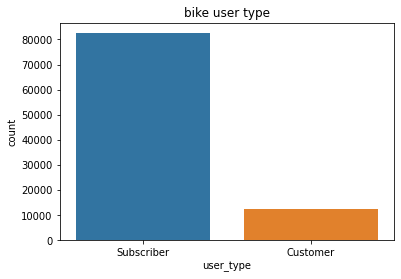

In [8]:
sb.countplot(data= df ,x = "user_type");
plt.title('bike user type');

**In the above plot we observe that the subscribers represents a larger user platfrom than the customers.**

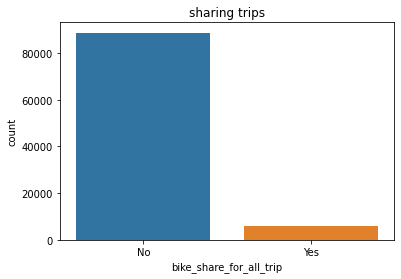

In [9]:
sb.countplot(data= df ,x = "bike_share_for_all_trip");
plt.title('sharing trips');

**In the above plot we observe that most of the population doesn't share their trips.**

C:\Users\mohga\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\mohga\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\mohga\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
C:\Users\mohga\Anaconda3\lib\site-packages\pandas\plotting\_matpl

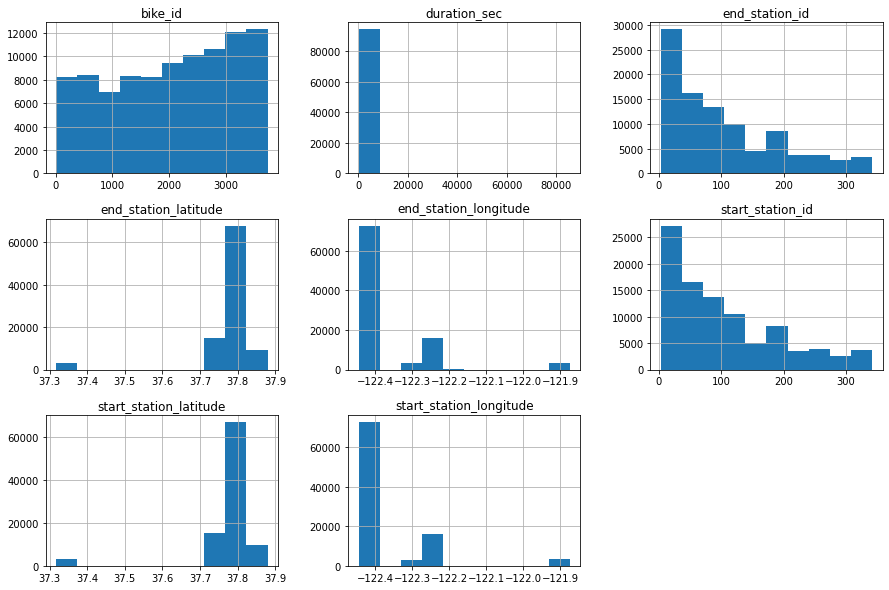

In [10]:
df.hist(figsize=(15,10));

**This is a dataset histograms to provide further understanding of the data.**

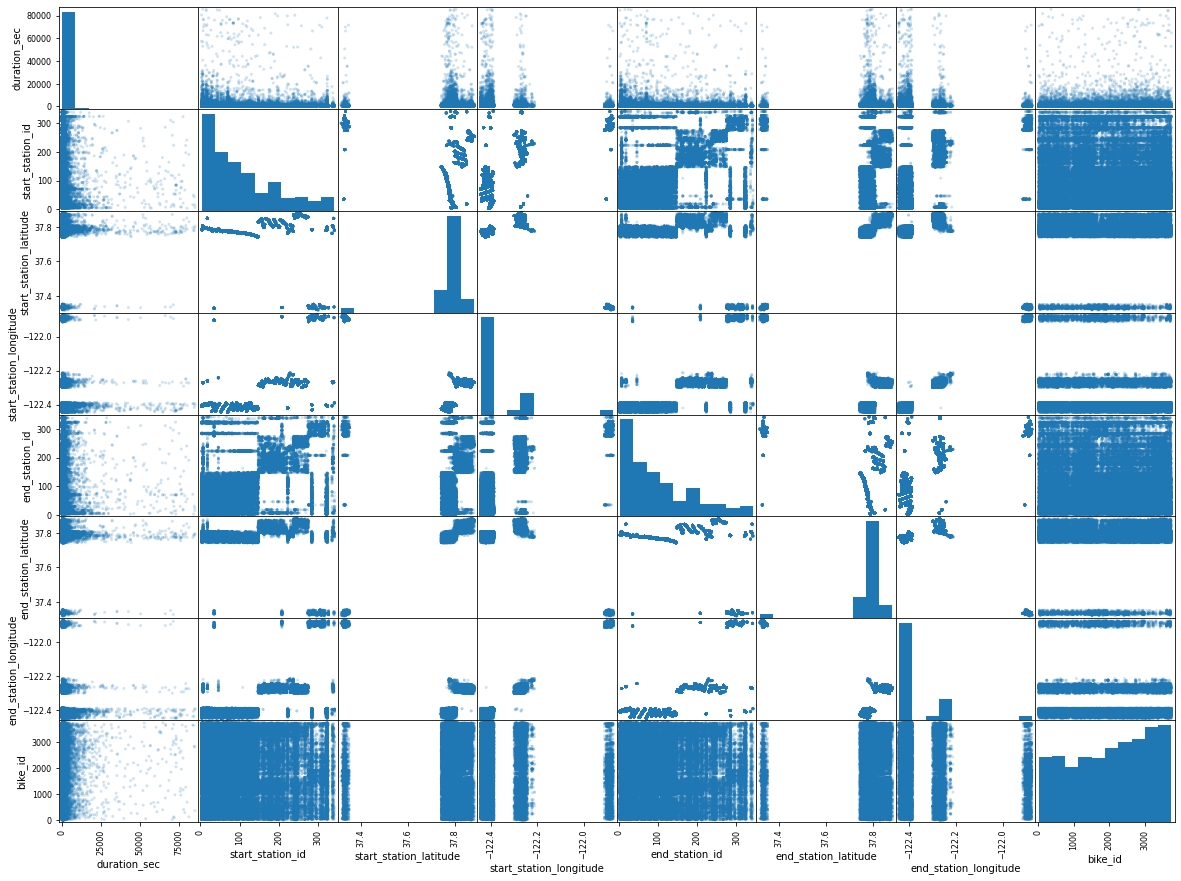

In [11]:
pd.plotting.scatter_matrix(df, alpha=0.2,figsize=(20,15));

**In the above plot we observe the histograms of the data sets.**


### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> there weren't any unsual points and i didn't need to perform any transformation

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> no, all the data was appropriately distributed so i didn't need to perform any operations.

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

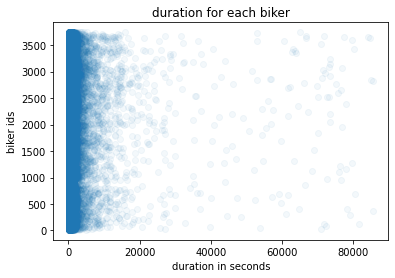

In [12]:
plt.scatter(data  = df ,x = "duration_sec", y = "bike_id", alpha = 1/20);
plt.title('duration for each biker');
plt.xlabel('duration in seconds');
plt.ylabel('biker ids');

**we observe that the first 10000 has the highest density but the data is not clear we need to work on it**

In [13]:
new_duration = df['duration_sec'].astype('int')

In [14]:
new_duration = new_duration/60
new_duration = df['duration_sec'].astype('int')

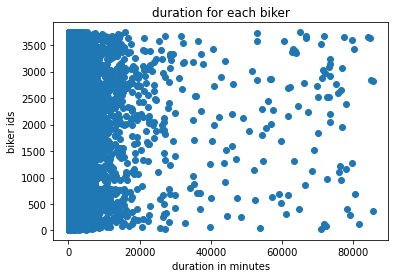

In [15]:
plt.scatter(new_duration , df['bike_id']);
plt.title('duration for each biker');
plt.xlabel('duration in minutes');
plt.ylabel('biker ids');

**we observe a positive correlation between the biker id and the duration in minutes: 0.000734975901526202**

In [16]:
new_id = df['bike_id'].astype('int');

In [17]:
new_duration.corr(new_id)

0.000734975901526202

In [18]:
df2.head(10)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,68213B7BB2420043,electric_bike,2020-07-31 17:36:17,2020-07-31 17:48:13,NaN,NaN,McAllister St at Baker St,52.0,37.790000,-122.460000,37.777414,-122.441949,casual
1,A64F0CD3A8E59529,electric_bike,2020-07-31 19:42:50,2020-07-31 19:49:54,Buchanan St at North Point St,400.0,Buchanan St at North Point St,400.0,37.804388,-122.433510,37.804408,-122.433509,casual
2,B3690CA0F5179242,electric_bike,2020-07-31 17:18:46,2020-07-31 17:36:31,NaN,NaN,Hyde St at Post St,369.0,37.760000,-122.410000,37.787422,-122.416777,casual
3,162FFE2E157F4C8F,electric_bike,2020-07-31 20:48:47,2020-07-31 21:05:04,Jersey St at Castro St,137.0,NaN,NaN,37.750576,-122.433743,37.770000,-122.420000,casual
4,C5DA8100F428B934,electric_bike,2020-07-31 20:18:24,2020-07-31 20:24:26,Market St at Steuart St,16.0,NaN,NaN,37.794582,-122.394791,37.790000,-122.400000,casual
5,E0C9A74ED3961210,electric_bike,2020-07-31 22:07:11,2020-07-31 22:13:09,Newbury Park Dr at King Rd,442.0,NaN,NaN,37.365589,-121.867895,37.350000,-121.880000,casual
6,DABCDF2D3FD03474,electric_bike,2020-07-31 18:15:37,2020-07-31 18:33:11,NaN,NaN,San Francisco Ferry Building (Harry Bridges Pl...,15.0,37.800000,-122.420000,37.795310,-122.394190,casual
7,70A50F2CCD3A25CF,electric_bike,2020-07-31 18:04:58,2020-07-31 18:08:25,NaN,NaN,NaN,NaN,37.740000,-122.420000,37.740000,-122.410000,casual
8,385534505B0034E7,electric_bike,2020-07-23 10:37:37,2020-07-23 10:54:20,NaN,NaN,NaN,NaN,37.760000,-122.410000,37.780000,-122.410000,casual
9,1E25D067C8E0B8E6,electric_bike,2020-07-23 11:14:41,2020-07-23 11:25:15,NaN,NaN,NaN,NaN,37.780000,-122.410000,37.770000,-122.420000,casual


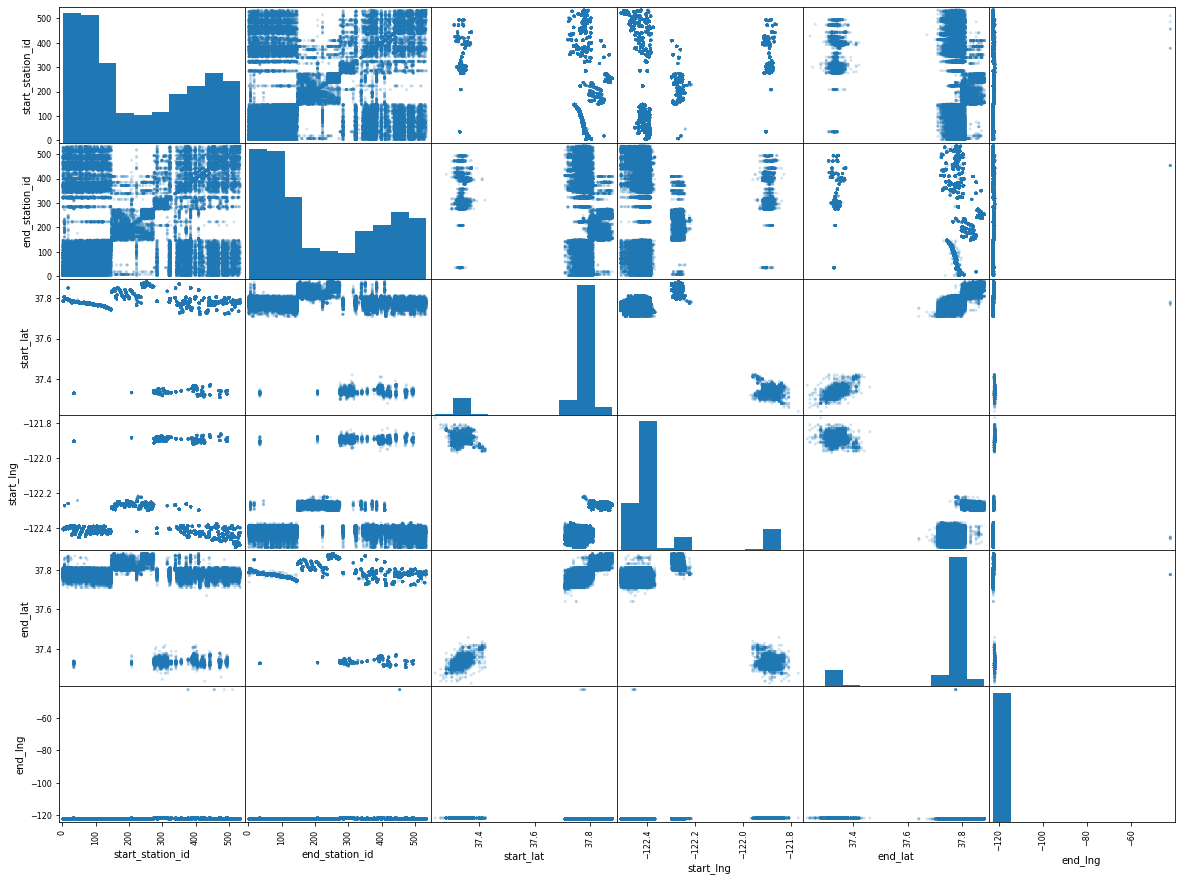

In [19]:
pd.plotting.scatter_matrix(df2, alpha=0.2,figsize=(20,15));

In [20]:
new_start = df2['started_at'].astype(str).str[11:]
hours = new_start.astype(str).str[0:2]
minutes = new_start.astype(str).str[3:5]
seconds = new_start.astype(str).str[6:8]
start_duration = seconds + (minutes * 60) 
start_duration = start_duration.astype(float)
start_duration

0         1.736364e+121
1         5.042424e+121
2         4.618182e+121
3         4.748485e+121
4         2.418182e+121
              ...      
154962    3.232323e+121
154963    1.520202e+121
154964    5.204040e+121
154965    5.713131e+121
154966    4.847475e+121
Name: started_at, Length: 154967, dtype: float64

In [21]:
old_start = df2['ended_at'].astype(str).str[11:]
hours = old_start.astype(str).str[0:2]
minutes = old_start.astype(str).str[3:5]
seconds = old_start.astype(str).str[6:8]
end_duration = seconds + (minutes * 60)
end_duration = end_duration.astype(float)
end_duration

0         1.348485e+121
1         5.449495e+121
2         3.136364e+121
3         4.050505e+120
4         2.624242e+121
              ...      
154962    5.644444e+121
154963    1.903030e+121
154964    5.057576e+121
154965    4.329293e+121
154966    1.359596e+121
Name: ended_at, Length: 154967, dtype: float64

In [22]:
difference = end_duration - start_duration
difference

0        -3.878788e+120
1         4.070707e+120
2        -1.481818e+121
3        -4.343434e+121
4         2.060606e+120
              ...      
154962    2.412121e+121
154963    3.828283e+120
154964   -1.464646e+120
154965   -1.383838e+121
154966   -3.487879e+121
Length: 154967, dtype: float64

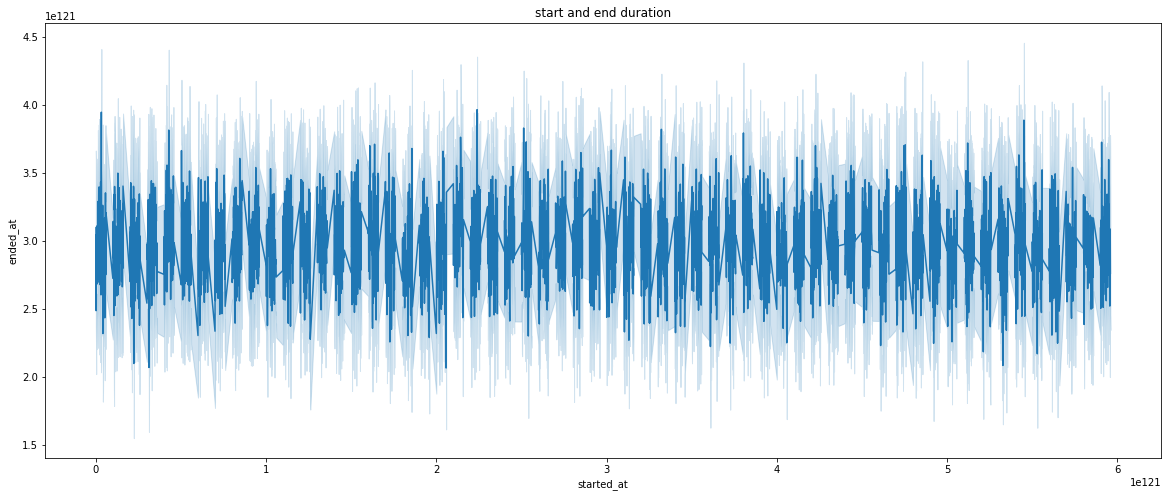

In [23]:
plt.figure(figsize = [20, 8])
sb.lineplot(x = start_duration, y = end_duration , legend = 'full');
plt.title('start and end duration');

**We observe that there's a negative correlation between when the biker started the journey and when they have ended it: -0.0038191059299354634**

In [24]:
start_duration.corr(end_duration)

-0.0038191059299354634

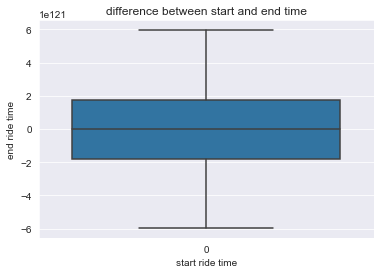

In [25]:
# ride_id, rideable_type
sb.set_style("darkgrid")
sb.boxplot(data= difference);
plt.title("difference between start and end time");
plt.xlabel('start ride time');
plt.ylabel('end ride time');

**We observe that the difference between the start and end ride is between -2 and 2**

In [26]:
df['start_station_id'].astype('int')

0        120
1         15
2        304
3         75
4         74
        ... 
94797     23
94798     17
94799     97
94800     74
94801    316
Name: start_station_id, Length: 94802, dtype: int32

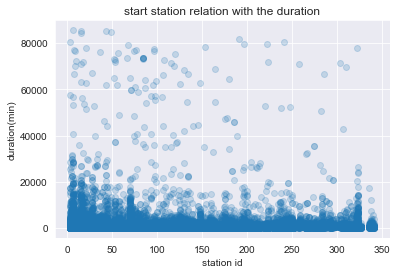

In [27]:
plt.scatter( df['start_station_id'] , new_duration , alpha=0.2);
plt.title('start station relation with the duration');
plt.xlabel('station id');
plt.ylabel('duration(min)');

**we observe that there's a negative correlation between the station id and the biker duarion: -0.012842493929129168**

In [28]:
new_duration.astype('int')

0        75284
1        85422
2        71576
3        61076
4        39966
         ...  
94797      695
94798      600
94799     1151
94800      714
94801      145
Name: duration_sec, Length: 94802, dtype: int32

In [29]:
new_station_id = df['start_station_id'].astype('int')

In [30]:
new_station_id.corr(new_duration)

-0.012842493929129175

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> we observe that there's a negative relationship between when the biker start their journey and when they end it.
> we also observe that the trip duration lays between -2 and 2.


### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> No, nothing is out of the ordinary

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

In [31]:
new_start = df['start_station_id'].astype('int')
new_start

0        120
1         15
2        304
3         75
4         74
        ... 
94797     23
94798     17
94799     97
94800     74
94801    316
Name: start_station_id, Length: 94802, dtype: int32

In [32]:
old_start = df['end_station_id'].astype('int')
old_start

0        285
1         15
2        296
3         47
4         19
        ... 
94797     66
94798     19
94799    125
94800     70
94801    311
Name: end_station_id, Length: 94802, dtype: int32

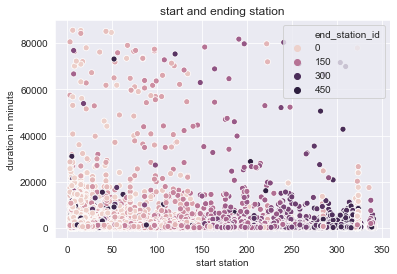

In [33]:
sb.scatterplot(data = df, x = new_start, y = new_duration, hue = old_start);
plt.title('start and ending station');
plt.xlabel('start station');
plt.ylabel('duration in minuts');

**we observe a negative correlation between the start station, old station and biker duration.**

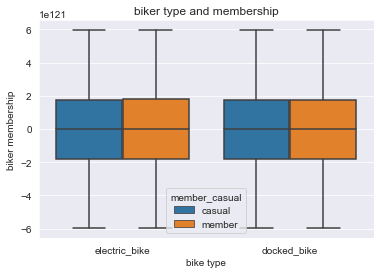

In [47]:
sb.boxplot(data = df2 , x = df2['rideable_type'], y =  difference , hue= "member_casual");

plt.title('biker type and membership');
plt.xlabel('bike type');
plt.ylabel('biker membership');

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> At first we observe that there a negative relation between the ride duration, start station and old station. then we see that there's also a negative relationship between the ride duration, start station and biker id. finally we observe that there's a negative relationship between the old station, ride duration and biker id.

### Were there any interesting or surprising interactions between features?

> yes the interaction between the starting and ending station together with the biker duration and the following two relationships. I thought that they would be positive since the first relationship is negative but i was wrong.

# The Summary:

### Main Findings
> <ol>
    <li>In univeriate explorations we have found that the percentage of participation of the subscribers is much more than the percentage of customers</li>
    <li>In the bivariate explorations we observe that there's a positive correlation between the user type and the ride duration in minutes. we also find a positive correlation between the biker id and duration in minutes.</li>
    <li>In the multivariate explorations we observe that there's a negative correlation between the starting and ending station and the ride duration in minutes / also the fact that the number of both the cusaul and member members have the same number of electirc and docked bikes</li>
</ol>

### Key Insights
<ol>
    <li>there's a positive correlation between the starting and ending station and the ride duration in minutes.</li>
    <li>there's a positive correlation between the user type and the ride duration in minutes.</li>
    <li>there's a negative correlation between the biker id and duration in minutes.</li>
</ol>